# Data Cleaning and transformation processes

### Import the right modules

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerica manipulation
import matplotlib.pyplot as plt # for visualization
import re

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk.corpus
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import seaborn as sns
import wordcloud as wc
  
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Migaliza
[nltk_data]     Lung'ahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Migaliza
[nltk_data]     Lung'ahu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Retreiving Data

In [2]:
# from a .csv (Comma separated format files) / .xlsx of txt file
file_name = "C:\\Users\\Migaliza Lung'ahu\\Documents\\Personal Portfolio\\Sentiment Analysis\\kipchoge.csv"
twitter_data = pd.read_csv(file_name)

### View the DataFrame that you just Loaded

In [3]:
display(twitter_data.head(5))

,Unnamed: 0,Tweet
0,0,"RT @GKamworor: You are my mentor,my training p..."
1,1,RT @SafaricomPLC: To show our commitment and r...
2,2,"RT @GKamworor: You are my mentor,my training p..."
3,3,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
4,4,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...


### ...We will focus on the Tweets 

In [4]:
pd.set_option('display.width',1000)
df = twitter_data[['Tweet']]
df.head(10)

,Tweet
0,"RT @GKamworor: You are my mentor,my training p..."
1,RT @SafaricomPLC: To show our commitment and r...
2,"RT @GKamworor: You are my mentor,my training p..."
3,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
4,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
5,RT @NelsonHavi: Eliud Kipchoge is determined t...
6,RT @SafaricomPLC: To show our commitment and r...
7,RT @SafaricomPLC: To show our commitment and r...
8,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
9,Safaricom launches new M-Pesa logo in support ...


### Lets Look at the properties of this Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Tweet    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


### Thumbs up!! There is no null Value: There are 10,000 records of data. 

#### Have a closer look did you notice something from the data

In [6]:
df.head(20)

,Tweet
0,"RT @GKamworor: You are my mentor,my training p..."
1,RT @SafaricomPLC: To show our commitment and r...
2,"RT @GKamworor: You are my mentor,my training p..."
3,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
4,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
5,RT @NelsonHavi: Eliud Kipchoge is determined t...
6,RT @SafaricomPLC: To show our commitment and r...
7,RT @SafaricomPLC: To show our commitment and r...
8,RT @MutahiNgunyi: To ELIUD Kipchoge I want to ...
9,Safaricom launches new M-Pesa logo in support ...


### You are right there are duplicated values. Lets Find out how many

In [7]:
#chained method to reset index 
df.drop_duplicates().reset_index(drop=True).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 1 columns):
Tweet    1878 non-null object
dtypes: object(1)
memory usage: 14.8+ KB


### Lets take a closer look at the tweets, note the special characters that will not make much sense in analysing

In [8]:

tweets = df['Tweet'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
a = re.sub('[^A-Za-z]+', ' ', tweets)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(nltk.corpus.stopwords.words('english'))   
stop_words.extend(nltk_words)


word_tokens = word_tokenize(a)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   


top_N = 100
# Calculate frequency distribution


### Frequency of words

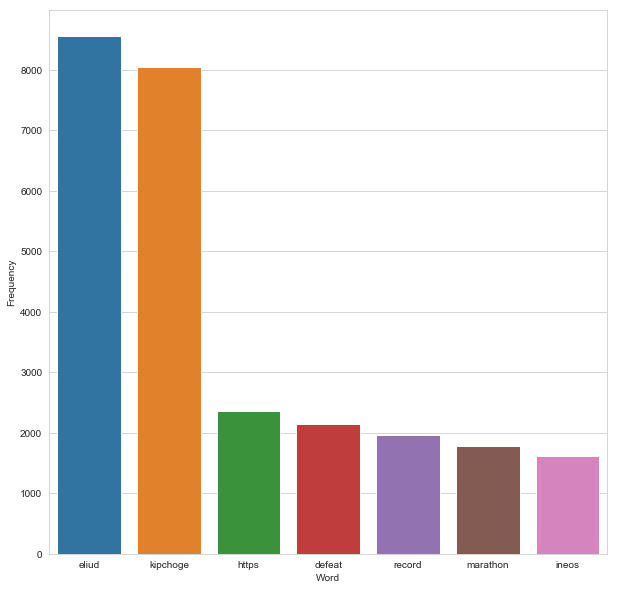

In [9]:
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

### POLARITY

In [10]:
from textblob import TextBlob

bloblist_tags = list()
df.columns
df_tweets=df['Tweet']
for row in df_tweets:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_tags =  pd.DataFrame(bloblist_tags, columns = ['tweet','sentiment','polarity'])
 
def f_tags(df_polarity_tags):
    if df_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


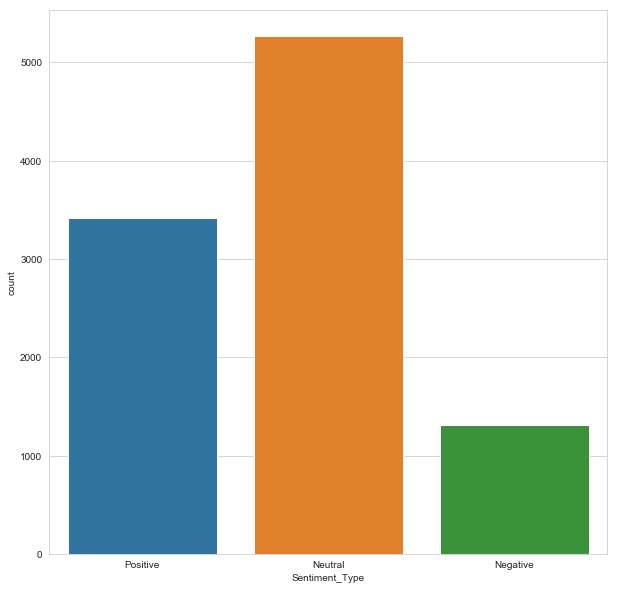

In [11]:

df_polarity_tags['Sentiment_Type'] = df_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_tags)

In [12]:
jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve

SyntaxError: invalid syntax (<ipython-input-12-01b1c3995321>, line 1)